In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
from math import floor
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from statistics import mean
from sklearn.neighbors import KNeighborsRegressor

In [2]:
khatkesh_columns = ['ride_id', 'driver_id', 'a_t_a_result.arrival_a_t_a', 'a_t_a_result.boarding_a_t_a', 'a_t_a_result.ride_a_t_a', 'a_t_a_result.arrival_probe_result.probe.point.lat', 'a_t_a_result.arrival_probe_result.probe.point.lon', 'a_t_a_result.arrival_probe_result.probe.timestamp', 'a_t_a_result.arrival_probe_result.confidence', 'a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level', 'a_t_a_result.boarding_probe_result.probe.point.lat', 'a_t_a_result.boarding_probe_result.probe.point.lon', 'a_t_a_result.boarding_probe_result.probe.timestamp', 'a_t_a_result.boarding_probe_result.confidence', 'a_t_a_result.boarding_probe_result.h3_index', 'a_t_a_result.boarding_probe_result.k_ring_level', 'a_t_a_result.final_destination_probe_result.probe.point.lat', 'a_t_a_result.final_destination_probe_result.probe.point.lon', 'a_t_a_result.final_destination_probe_result.probe.timestamp', 'a_t_a_result.final_destination_probe_result.confidence', 'a_t_a_result.final_destination_probe_result.h3_index', 'a_t_a_result.final_destination_probe_result.k_ring_level',' a_t_a_result.destination_probe_result.probe.point.lat', 'a_t_a_result.destination_probe_result.probe.point.lon', 'a_t_a_result.destination_probe_result.probe.timestamp', 'a_t_a_result.destination_probe_result.confidence', 'a_t_a_result.destination_probe_result.h3_index', 'a_t_a_result.destination_probe_result.k_ring_level', 'a_t_a_result.extra_destination_probe_result.probe.point.lat', 'a_t_a_result.extra_destination_probe_result.probe.point.lon', 'a_t_a_result.extra_destination_probe_result.probe.timestamp', 'a_t_a_result.extra_destination_probe_result.confidence', 'a_t_a_result.extra_destination_probe_result.h3_index', 'a_t_a_result.extra_destination_probe_result.k_ring_level', 'pickup_a_d_d_result.distance', 'pickup_a_d_d_result.confidence', 'pickup_a_d_d_result.route_ratio', 'pickup_a_d_d_result.g_p_s_ratio', 'ride_a_d_d_result.distance', 'ride_a_d_d_result.confidence', 'ride_a_d_d_result.route_ratio', 'ride_a_d_d_result.g_p_s_ratio', 'total_a_d_d_confidence', 'in_ride_allotment', 'e_d_d', 'allotment_time', 'accept_time', 'clickhouse_time', 'hash']

In [3]:
train_dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04']

In [4]:
khatkesh_df = pd.concat((pd.read_csv('../khatkesh_' + d + '_.csv', names=khatkesh_columns) for d in train_dates))
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
0,5587737228,2161673,0,2.530000e+02,555,38.069263,46.255939,1.672495e+09,0.0,8c2c1c624ccd5ff,...,0.500000,0.0,0.000000,0.450000,0.0,15.300000,0.0,1.672495e+09,2023-01-01 00:00:37,3253544644586005851
1,5587591271,2161890,0,2.120000e+02,549,34.626175,50.917072,1.672494e+09,0.0,8c2cf269c66c7ff,...,0.500000,0.0,0.000000,0.450000,0.0,12.960000,0.0,1.672494e+09,2023-01-01 00:01:49,4274608410283198763
2,5587917951,2162403,0,1.844674e+19,63808095089,35.725441,51.388359,1.672496e+09,0.0,8c2cf3014a72bff,...,0.000000,0.0,0.000000,0.000000,0.0,11.323000,0.0,1.672496e+09,2023-01-01 00:00:37,634209464890668541
3,5587490491,2162626,0,1.844674e+19,63808092982,36.274330,59.617714,1.672494e+09,0.0,8c43608ebb0abff,...,0.000000,0.0,0.000000,0.000000,0.0,23.070999,0.0,1.672494e+09,2023-01-01 00:04:12,12923008145912004440
4,5588244658,2162841,0,6.380810e+10,667,36.307671,59.640919,1.844674e+19,0.0,8c4360bb4a1edff,...,0.500000,0.0,0.000000,0.450000,0.0,2.018000,0.0,1.844674e+19,2023-01-01 00:05:25,10678463226377223070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444296,5617067631,2909988,0,1.844674e+19,63808460886,35.761482,51.394924,1.672863e+09,0.0,8c2cf300449e7ff,...,0.000000,0.0,0.000000,0.000000,0.0,13.608000,0.0,1.672863e+09,2023-01-04 23:59:33,17385418123558899791
2444297,5617041547,3701760,287,2.000000e+00,1830,35.787815,50.861763,1.672862e+09,1.0,8c2cf3d624767ff,...,1.000000,0.0,1.000000,1.000000,0.0,16.267000,0.0,1.672862e+09,2023-01-04 23:59:33,16738494056738467025
2444298,5614036632,3701967,0,0.000000e+00,63808433522,31.345924,48.718929,1.844674e+19,0.0,8c2c9dca09647ff,...,0.000000,0.0,0.000000,0.000000,0.0,8.833000,0.0,1.844674e+19,2023-01-04 23:56:06,18075128956234825057
2444299,5614212655,2911858,0,1.844674e+19,63808433610,38.227600,48.306931,1.672836e+09,0.0,8c2c194c48367ff,...,0.000000,0.0,0.000000,0.000000,0.0,1.980000,0.0,1.672836e+09,2023-01-04 23:57:16,11827370204204240146


There are some duplicates in the data
**MAYBE WE ARE KEEPING THE WRONG ROWS**

In [5]:
khatkesh_df = khatkesh_df.drop_duplicates(subset=['ride_id', 'a_t_a_result.ride_a_t_a'])
len(khatkesh_df)

12510708

We only work with the data that we are confident about the ATA

In [6]:
khatkesh_df = khatkesh_df[(khatkesh_df['a_t_a_result.final_destination_probe_result.confidence'] > 0) & (khatkesh_df['a_t_a_result.boarding_probe_result.confidence'] > 0)]
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
22,5588329037,2171139,115,4.0,236,36.286480,59.610023,1.672500e+09,0.591716,8c43608e91a01ff,...,1.000000,0.0,0.958333,0.884177,0.000,0.969,0.0,1.672500e+09,2023-01-01 00:02:57,12578648305080645191
38,5588308483,2178977,51,0.0,628,36.309143,59.472126,1.672500e+09,1.000000,8c4360809d903ff,...,0.575673,0.0,0.158730,0.518106,0.000,7.127,0.0,1.672500e+09,2023-01-01 00:05:25,15408813415602945483
40,5588038088,2179919,379,36.0,715,31.884789,54.345654,1.672498e+09,0.350128,8c432e8f63889ff,...,0.827889,0.0,0.805556,0.858298,0.000,9.410,0.0,1.672497e+09,2023-01-01 00:05:25,12780378572809757550
42,5588231492,2180864,22,8.0,652,34.082855,49.706772,1.672499e+09,1.000000,8c2c8d7a104c1ff,...,1.000000,0.0,1.000000,1.000000,0.000,2.059,0.0,1.672499e+09,2023-01-01 00:01:49,2925408390312839644
57,5588081717,2186412,195,42.0,469,31.832134,54.378353,1.672498e+09,1.000000,8c432e88b3811ff,...,1.000000,0.0,0.914894,1.000000,0.000,3.948,0.0,1.672498e+09,2023-01-01 00:01:49,11432841189254269889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444273,5617064217,4668034,116,351.0,916,31.916067,54.373272,1.672863e+09,0.769231,8c432e8f1856bff,...,0.957483,0.0,0.913043,0.963321,0.000,8.912,0.0,1.672862e+09,2023-01-04 23:57:16,5082892337309271587
2444283,5616939314,3030241,213,4.0,3364,35.516766,51.154713,1.672860e+09,1.000000,8c2cf3cd16a45ff,...,0.869115,0.0,0.946588,0.884703,0.000,50.861,0.0,1.672860e+09,2023-01-04 23:59:33,8719832094409092419
2444287,5617106478,4400023,131,84.0,212,36.280865,49.993206,1.672864e+09,0.769231,8c2cf01293851ff,...,1.000000,0.0,1.000000,1.000000,0.000,0.681,0.0,1.672863e+09,2023-01-04 23:56:06,12679993341374806958
2444295,5616960010,2909462,329,44.0,1842,29.446220,55.697697,1.672861e+09,0.769231,8c430391c086dff,...,0.970132,0.0,0.918919,0.980072,3.646,4.945,191.0,1.672860e+09,2023-01-04 23:57:16,16437214378447209594


We leave out the rides which have an extra destination

In [7]:
khatkesh_df = khatkesh_df[khatkesh_df['a_t_a_result.extra_destination_probe_result.confidence'] == 0]
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
22,5588329037,2171139,115,4.0,236,36.286480,59.610023,1.672500e+09,0.591716,8c43608e91a01ff,...,1.000000,0.0,0.958333,0.884177,0.000,0.969,0.0,1.672500e+09,2023-01-01 00:02:57,12578648305080645191
38,5588308483,2178977,51,0.0,628,36.309143,59.472126,1.672500e+09,1.000000,8c4360809d903ff,...,0.575673,0.0,0.158730,0.518106,0.000,7.127,0.0,1.672500e+09,2023-01-01 00:05:25,15408813415602945483
40,5588038088,2179919,379,36.0,715,31.884789,54.345654,1.672498e+09,0.350128,8c432e8f63889ff,...,0.827889,0.0,0.805556,0.858298,0.000,9.410,0.0,1.672497e+09,2023-01-01 00:05:25,12780378572809757550
42,5588231492,2180864,22,8.0,652,34.082855,49.706772,1.672499e+09,1.000000,8c2c8d7a104c1ff,...,1.000000,0.0,1.000000,1.000000,0.000,2.059,0.0,1.672499e+09,2023-01-01 00:01:49,2925408390312839644
57,5588081717,2186412,195,42.0,469,31.832134,54.378353,1.672498e+09,1.000000,8c432e88b3811ff,...,1.000000,0.0,0.914894,1.000000,0.000,3.948,0.0,1.672498e+09,2023-01-01 00:01:49,11432841189254269889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444273,5617064217,4668034,116,351.0,916,31.916067,54.373272,1.672863e+09,0.769231,8c432e8f1856bff,...,0.957483,0.0,0.913043,0.963321,0.000,8.912,0.0,1.672862e+09,2023-01-04 23:57:16,5082892337309271587
2444283,5616939314,3030241,213,4.0,3364,35.516766,51.154713,1.672860e+09,1.000000,8c2cf3cd16a45ff,...,0.869115,0.0,0.946588,0.884703,0.000,50.861,0.0,1.672860e+09,2023-01-04 23:59:33,8719832094409092419
2444287,5617106478,4400023,131,84.0,212,36.280865,49.993206,1.672864e+09,0.769231,8c2cf01293851ff,...,1.000000,0.0,1.000000,1.000000,0.000,0.681,0.0,1.672863e+09,2023-01-04 23:56:06,12679993341374806958
2444295,5616960010,2909462,329,44.0,1842,29.446220,55.697697,1.672861e+09,0.769231,8c430391c086dff,...,0.970132,0.0,0.918919,0.980072,3.646,4.945,191.0,1.672860e+09,2023-01-04 23:57:16,16437214378447209594


For now that we don't have access to fraud rides table, maybe dropping the rides with ADD confidence = 0 can give us a better dataset

In [8]:
khatkesh_df = khatkesh_df[khatkesh_df['ride_a_d_d_result.confidence'] > 0]
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
22,5588329037,2171139,115,4.0,236,36.286480,59.610023,1.672500e+09,0.591716,8c43608e91a01ff,...,1.000000,0.0,0.958333,0.884177,0.000,0.969,0.0,1.672500e+09,2023-01-01 00:02:57,12578648305080645191
38,5588308483,2178977,51,0.0,628,36.309143,59.472126,1.672500e+09,1.000000,8c4360809d903ff,...,0.575673,0.0,0.158730,0.518106,0.000,7.127,0.0,1.672500e+09,2023-01-01 00:05:25,15408813415602945483
40,5588038088,2179919,379,36.0,715,31.884789,54.345654,1.672498e+09,0.350128,8c432e8f63889ff,...,0.827889,0.0,0.805556,0.858298,0.000,9.410,0.0,1.672497e+09,2023-01-01 00:05:25,12780378572809757550
42,5588231492,2180864,22,8.0,652,34.082855,49.706772,1.672499e+09,1.000000,8c2c8d7a104c1ff,...,1.000000,0.0,1.000000,1.000000,0.000,2.059,0.0,1.672499e+09,2023-01-01 00:01:49,2925408390312839644
57,5588081717,2186412,195,42.0,469,31.832134,54.378353,1.672498e+09,1.000000,8c432e88b3811ff,...,1.000000,0.0,0.914894,1.000000,0.000,3.948,0.0,1.672498e+09,2023-01-01 00:01:49,11432841189254269889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444273,5617064217,4668034,116,351.0,916,31.916067,54.373272,1.672863e+09,0.769231,8c432e8f1856bff,...,0.957483,0.0,0.913043,0.963321,0.000,8.912,0.0,1.672862e+09,2023-01-04 23:57:16,5082892337309271587
2444283,5616939314,3030241,213,4.0,3364,35.516766,51.154713,1.672860e+09,1.000000,8c2cf3cd16a45ff,...,0.869115,0.0,0.946588,0.884703,0.000,50.861,0.0,1.672860e+09,2023-01-04 23:59:33,8719832094409092419
2444287,5617106478,4400023,131,84.0,212,36.280865,49.993206,1.672864e+09,0.769231,8c2cf01293851ff,...,1.000000,0.0,1.000000,1.000000,0.000,0.681,0.0,1.672863e+09,2023-01-04 23:56:06,12679993341374806958
2444295,5616960010,2909462,329,44.0,1842,29.446220,55.697697,1.672861e+09,0.769231,8c430391c086dff,...,0.970132,0.0,0.918919,0.980072,3.646,4.945,191.0,1.672860e+09,2023-01-04 23:57:16,16437214378447209594


round trip

speed

In [9]:
speed = khatkesh_df['ride_a_d_d_result.distance'] * 3600 / khatkesh_df['a_t_a_result.ride_a_t_a']

In [10]:
khatkesh_df = khatkesh_df[(speed < 125) & (speed > 5)]
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
22,5588329037,2171139,115,4.0,236,36.286480,59.610023,1.672500e+09,0.591716,8c43608e91a01ff,...,1.000000,0.0,0.958333,0.884177,0.000,0.969,0.0,1.672500e+09,2023-01-01 00:02:57,12578648305080645191
38,5588308483,2178977,51,0.0,628,36.309143,59.472126,1.672500e+09,1.000000,8c4360809d903ff,...,0.575673,0.0,0.158730,0.518106,0.000,7.127,0.0,1.672500e+09,2023-01-01 00:05:25,15408813415602945483
40,5588038088,2179919,379,36.0,715,31.884789,54.345654,1.672498e+09,0.350128,8c432e8f63889ff,...,0.827889,0.0,0.805556,0.858298,0.000,9.410,0.0,1.672497e+09,2023-01-01 00:05:25,12780378572809757550
42,5588231492,2180864,22,8.0,652,34.082855,49.706772,1.672499e+09,1.000000,8c2c8d7a104c1ff,...,1.000000,0.0,1.000000,1.000000,0.000,2.059,0.0,1.672499e+09,2023-01-01 00:01:49,2925408390312839644
57,5588081717,2186412,195,42.0,469,31.832134,54.378353,1.672498e+09,1.000000,8c432e88b3811ff,...,1.000000,0.0,0.914894,1.000000,0.000,3.948,0.0,1.672498e+09,2023-01-01 00:01:49,11432841189254269889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444273,5617064217,4668034,116,351.0,916,31.916067,54.373272,1.672863e+09,0.769231,8c432e8f1856bff,...,0.957483,0.0,0.913043,0.963321,0.000,8.912,0.0,1.672862e+09,2023-01-04 23:57:16,5082892337309271587
2444283,5616939314,3030241,213,4.0,3364,35.516766,51.154713,1.672860e+09,1.000000,8c2cf3cd16a45ff,...,0.869115,0.0,0.946588,0.884703,0.000,50.861,0.0,1.672860e+09,2023-01-04 23:59:33,8719832094409092419
2444287,5617106478,4400023,131,84.0,212,36.280865,49.993206,1.672864e+09,0.769231,8c2cf01293851ff,...,1.000000,0.0,1.000000,1.000000,0.000,0.681,0.0,1.672863e+09,2023-01-04 23:56:06,12679993341374806958
2444295,5616960010,2909462,329,44.0,1842,29.446220,55.697697,1.672861e+09,0.769231,8c430391c086dff,...,0.970132,0.0,0.918919,0.980072,3.646,4.945,191.0,1.672860e+09,2023-01-04 23:57:16,16437214378447209594


In [11]:
khatkesh_df['source_lat'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lat']
khatkesh_df['source_lng'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lon']

khatkesh_df['dest_lat'] = khatkesh_df['a_t_a_result.final_destination_probe_result.probe.point.lat']
khatkesh_df['dest_lng'] = khatkesh_df['a_t_a_result.final_destination_probe_result.probe.point.lon']

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/1692714103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_lat'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lat']
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/1692714103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_lng'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lon']
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/169271

In [12]:
khatkesh_df['source_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
khatkesh_df['dest_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 4), axis=1)

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/1108665080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/1108665080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['dest_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 4), axis=1)


In [13]:
khatkesh_df = khatkesh_df[khatkesh_df['source_h3_4'] == '842cf31ffffffff']
khatkesh_df = khatkesh_df[khatkesh_df['dest_h3_4'] == '842cf31ffffffff']
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,allotment_time,accept_time,clickhouse_time,hash,source_lat,source_lng,dest_lat,dest_lng,source_h3_4,dest_h3_4
220,5588248883,2258129,180,155.0,637,35.731709,51.525162,1.672499e+09,0.769231,8c2cf30e60ae9ff,...,0.0,1.672499e+09,2023-01-01 00:02:57,1601390439652463931,35.731636,51.525532,35.741768,51.544617,842cf31ffffffff,842cf31ffffffff
240,5588234031,2265476,58,0.0,726,35.779987,51.516701,1.672499e+09,0.455166,8c2cf300b043dff,...,0.0,1.672499e+09,2023-01-01 00:00:37,15724325619924338916,35.779987,51.516701,35.803802,51.510651,842cf31ffffffff,842cf31ffffffff
283,5588176649,858277,384,44.0,848,35.761181,51.335781,1.672499e+09,1.000000,8c2cf30343613ff,...,0.0,1.672498e+09,2023-01-01 00:01:49,5605562630295081103,35.761261,51.335800,35.775879,51.312469,842cf31ffffffff,842cf31ffffffff
322,5588032652,2289478,94,36.0,2444,35.768532,51.361492,1.672497e+09,1.000000,8c2cf30352d3dff,...,0.0,1.672497e+09,2023-01-01 00:05:25,8469526244514427004,35.768539,51.361496,35.697433,51.349918,842cf31ffffffff,842cf31ffffffff
333,5588088078,2295632,447,64.0,1804,35.725971,51.338257,1.672498e+09,1.000000,8c2cf30367acbff,...,0.0,1.672498e+09,2023-01-01 00:04:12,6933586941731668468,35.726028,51.338310,35.718754,51.428268,842cf31ffffffff,842cf31ffffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444164,5617092473,4666116,281,56.0,408,35.674454,51.338238,1.672863e+09,0.769231,8c2cf318e2dc5ff,...,0.0,1.672863e+09,2023-01-04 23:56:06,6632874758476072829,35.674473,51.338104,35.668514,51.368389,842cf31ffffffff,842cf31ffffffff
2444168,5617091238,951202,58,190.0,660,35.644882,51.462872,1.672863e+09,0.769231,8c2cf30aad183ff,...,0.0,1.672863e+09,2023-01-04 23:58:25,4760001849682502101,35.645161,51.462368,35.668598,51.453957,842cf31ffffffff,842cf31ffffffff
2444177,5617074284,4130485,199,132.0,822,35.722481,51.433704,1.672863e+09,1.000000,8c2cf30110097ff,...,0.0,1.672863e+09,2023-01-04 23:56:06,10813885399393105322,35.722469,51.433716,35.754124,51.325352,842cf31ffffffff,842cf31ffffffff
2444189,5617092454,3019259,161,28.0,668,35.763191,51.441845,1.672863e+09,1.000000,8c2cf30038ee5ff,...,0.0,1.672863e+09,2023-01-04 23:59:33,13472319297378946851,35.763084,51.441742,35.750519,51.464474,842cf31ffffffff,842cf31ffffffff


In [14]:
khatkesh_df['hour'] = khatkesh_df.apply(lambda row: ((row.accept_time - 1662147000) % 604800) / 3600, axis=1)
# rides_train_p1['holiday'] = rides_train_p1.apply(lambda row: int(row.created_at.split()[0] in train_holidays), axis=1)
# rides_train_p1
# khatkesh_df

In [15]:
khatkesh_df['source_h3_9'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 9), axis=1)
khatkesh_df['dest_h3_9'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 9), axis=1)

In [16]:
tmp = khatkesh_df[['ride_id', 'driver_id', 'clickhouse_time', 'source_h3_9', 'dest_h3_9', 'source_lat', 'source_lng', 'dest_lat', 'dest_lng', 'a_t_a_result.ride_a_t_a', 'hour', 'in_ride_allotment']]

In [17]:
waiting_df = pd.concat((pd.read_csv('../waiting_' + d + '.csv', names=['id', 'waiting_price', 'waiting']) for d in train_dates))
waiting_df

,id,waiting_price,waiting
0,5589790014,1,0m-5m
1,5589790814,1,0m-5m
2,5589790937,1,0m-5m
3,5589791156,1,0m-5m
4,5589791225,1,5m-10m
...,...,...,...
132282,5616993667,1,0m-5m
132283,5617019619,1,5m-10m
132284,5617031071,1,0m-5m
132285,5617078274,1,0m-5m


**waiting**
waiting df has 516,000 rows but only 26,000 of them is in tmp

In [18]:
tmp = tmp[~tmp['ride_id'].isin(waiting_df['id'])]
tmp

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour,in_ride_allotment
220,5588248883,2258129,2023-01-01 00:02:57,892cf30e60bffff,892cf30e057ffff,35.731636,51.525532,35.741768,51.544617,637,19.608056,0.0
240,5588234031,2265476,2023-01-01 00:00:37,892cf300b07ffff,892cf300907ffff,35.779987,51.516701,35.803802,51.510651,726,19.527222,0.0
283,5588176649,858277,2023-01-01 00:01:49,892cf303437ffff,892cf311bd7ffff,35.761261,51.335800,35.775879,51.312469,848,19.391944,0.0
322,5588032652,2289478,2023-01-01 00:05:25,892cf30352fffff,892cf3188a7ffff,35.768539,51.361496,35.697433,51.349918,2444,19.079722,0.0
333,5588088078,2295632,2023-01-01 00:04:12,892cf303673ffff,892cf30111bffff,35.726028,51.338310,35.718754,51.428268,1804,19.218889,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2444164,5617092473,4666116,2023-01-04 23:56:06,892cf318e2fffff,892cf318b4bffff,35.674473,51.338104,35.668514,51.368389,408,120.722500,0.0
2444168,5617091238,951202,2023-01-04 23:58:25,892cf30aad3ffff,892cf30ac6bffff,35.645161,51.462368,35.668598,51.453957,660,120.699444,0.0
2444177,5617074284,4130485,2023-01-04 23:56:06,892cf301107ffff,892cf303413ffff,35.722469,51.433716,35.754124,51.325352,822,120.596667,0.0
2444189,5617092454,3019259,2023-01-04 23:59:33,892cf30038fffff,892cf301dc7ffff,35.763084,51.441742,35.750519,51.464474,668,120.728056,0.0


round trip

In [19]:
round_trip_df = pd.concat((pd.read_csv('../round_trip_' + d + '.csv', names=['id', 'round_trip_price']) for d in train_dates))
round_trip_df

,id,round_trip_price
0,5589790074,104485
1,5589791120,94799
2,5589791201,72106
3,5589792038,57780
4,5589792152,148680
...,...,...
80897,5616793924,225976
80898,5616795001,379443
80899,5617022831,80250
80900,5617091705,91911


In [20]:
tmp = tmp[~tmp['ride_id'].isin(round_trip_df['id'])]
tmp

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour,in_ride_allotment
220,5588248883,2258129,2023-01-01 00:02:57,892cf30e60bffff,892cf30e057ffff,35.731636,51.525532,35.741768,51.544617,637,19.608056,0.0
240,5588234031,2265476,2023-01-01 00:00:37,892cf300b07ffff,892cf300907ffff,35.779987,51.516701,35.803802,51.510651,726,19.527222,0.0
283,5588176649,858277,2023-01-01 00:01:49,892cf303437ffff,892cf311bd7ffff,35.761261,51.335800,35.775879,51.312469,848,19.391944,0.0
322,5588032652,2289478,2023-01-01 00:05:25,892cf30352fffff,892cf3188a7ffff,35.768539,51.361496,35.697433,51.349918,2444,19.079722,0.0
333,5588088078,2295632,2023-01-01 00:04:12,892cf303673ffff,892cf30111bffff,35.726028,51.338310,35.718754,51.428268,1804,19.218889,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2444164,5617092473,4666116,2023-01-04 23:56:06,892cf318e2fffff,892cf318b4bffff,35.674473,51.338104,35.668514,51.368389,408,120.722500,0.0
2444168,5617091238,951202,2023-01-04 23:58:25,892cf30aad3ffff,892cf30ac6bffff,35.645161,51.462368,35.668598,51.453957,660,120.699444,0.0
2444177,5617074284,4130485,2023-01-04 23:56:06,892cf301107ffff,892cf303413ffff,35.722469,51.433716,35.754124,51.325352,822,120.596667,0.0
2444189,5617092454,3019259,2023-01-04 23:59:33,892cf30038fffff,892cf301dc7ffff,35.763084,51.441742,35.750519,51.464474,668,120.728056,0.0


cash

No other extra destination than khatkesh

In [21]:
# extra_destination_df = pd.concat((pd.read_csv('../extra_destination_' + d + '.csv', names=['id', 'extra_destination_price']) for d in train_dates))
# extra_destination_df

In [22]:
# tmp = tmp[~tmp['ride_id'].isin(extra_destination_df['id'])]
# tmp

In [23]:
source_h3 = tmp['source_h3_9'].value_counts()
source_h3

892cf318c73ffff    2623
892cf318c6fffff    2503
892cf31a977ffff    2108
892cf302a8fffff    1846
892cf30223bffff    1826
                   ... 
892cf319353ffff       1
892cf318e87ffff       1
892cf30987bffff       1
892cf309da3ffff       1
892cf30e5c3ffff       1
Name: source_h3_9, Length: 5902, dtype: int64

In [24]:
destination_h3 = tmp['dest_h3_9'].value_counts()
destination_h3

892cf30a54bffff    2302
892cf31a977ffff    2143
892cf30223bffff    2139
892cf318c6fffff    2078
892cf303437ffff    1999
                   ... 
892cf318453ffff       1
892cf30c89bffff       1
892cf3180b7ffff       1
892cf30548fffff       1
892cf356d83ffff       1
Name: dest_h3_9, Length: 6102, dtype: int64

In [25]:
a = source_h3[source_h3 > 700]
a

892cf318c73ffff    2623
892cf318c6fffff    2503
892cf31a977ffff    2108
892cf302a8fffff    1846
892cf30223bffff    1826
                   ... 
892cf30226fffff     705
892cf3011d3ffff     705
892cf30a2b3ffff     704
892cf30012bffff     704
892cf30118fffff     701
Name: source_h3_9, Length: 219, dtype: int64

In [26]:
b = destination_h3[destination_h3 > 700]
b

892cf30a54bffff    2302
892cf31a977ffff    2143
892cf30223bffff    2139
892cf318c6fffff    2078
892cf303437ffff    1999
                   ... 
892cf300ec7ffff     706
892cf30140bffff     706
892cf30110bffff     705
892cf31a323ffff     702
892cf319d67ffff     702
Name: dest_h3_9, Length: 241, dtype: int64

In [27]:
# a = rides_train_p1[(rides_train_p1['source_h3_9'] == "892cf318c73ffff") & (rides_train_p1['dest_h3_9'] == "892cf30a0b3ffff")][['eta', 'a_t_a_result.ride_a_t_a']]
# a
# for b, c in a.items():
#     print(b)

In [ ]:
for s, _ in a.items():
    for d, _ in b.items():
        cluster_ata = tmp[(tmp['source_h3_9'] == s) & (tmp['dest_h3_9'] == d)]['a_t_a_result.ride_a_t_a']
        if len(cluster_ata) > 10:
            print(s)
            print(d)
            print(len(cluster_ata))

from hotel to airport mehrabad

In [28]:
c = tmp[(tmp['source_h3_9'] == '892cf318c73ffff') & (tmp['dest_h3_9'] == '892cf318c6fffff')][['clickhouse_time', 'a_t_a_result.ride_a_t_a', 'hour', 'in_ride_allotment']]
c['hour_day'] = c['hour'] % 24

In [39]:
d = tmp[(tmp['source_h3_9'] == '892cf302a17ffff') & (tmp['dest_h3_9'] == '892cf300dcfffff')]
d['hour_day'] = d['hour'] % 24
d

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_8831/1015060286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['hour_day'] = d['hour'] % 24


,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour,in_ride_allotment,hour_day
2924509,5594861240,909635,2023-01-01 18:58:12,892cf302a17ffff,892cf300dcfffff,35.805809,51.434479,35.804222,51.474331,1564,43.345556,0.0,19.345556
1693847,5598928878,961792,2023-01-02 12:52:25,892cf302a17ffff,892cf300dcfffff,35.804073,51.433903,35.804577,51.476826,1388,61.358611,0.0,13.358611
3544453,5601920388,1446856,2023-01-02 19:17:52,892cf302a17ffff,892cf300dcfffff,35.804993,51.435802,35.804493,51.476967,956,67.988889,0.0,19.988889
3650448,5602058163,29910,2023-01-02 19:43:39,892cf302a17ffff,892cf300dcfffff,35.804863,51.433460,35.804535,51.477058,1287,68.324167,0.0,20.324167
1478221,5605453144,1414560,2023-01-03 12:16:45,892cf302a17ffff,892cf300dcfffff,35.804832,51.434811,35.805378,51.475250,1112,84.935278,0.0,12.935278
1736131,5605894559,3189562,2023-01-03 13:20:34,892cf302a17ffff,892cf300dcfffff,35.804825,51.434921,35.804352,51.477051,1031,85.983333,0.0,13.983333
2235675,5606620086,18216,2023-01-03 15:06:44,892cf302a17ffff,892cf300dcfffff,35.804714,51.434483,35.804901,51.474152,1026,87.783889,0.0,15.783889
2468189,5606986344,661137,2023-01-03 15:59:42,892cf302a17ffff,892cf300dcfffff,35.804958,51.434940,35.804531,51.477013,907,88.675833,0.0,16.675833
4285180,5609844349,1474319,2023-01-03 23:45:45,892cf302a17ffff,892cf300dcfffff,35.805031,51.436264,35.804535,51.476933,672,96.435833,0.0,0.435833
807513,5611135605,3661053,2023-01-04 09:55:44,892cf302a17ffff,892cf300dcfffff,35.804348,51.433971,35.803806,51.477108,1104,106.532500,0.0,10.532500


In [30]:
d['a_t_a_result.ride_a_t_a'].mean()

1110.0

In [31]:
d[d['in_ride_allotment'] > 0]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour,in_ride_allotment,hour_day


In [230]:
neigh_34_pred = np.array([])
neigh_34_true = np.array([])

neigh_10_pred = np.array([])
neigh_10_true = np.array([])

neigh_5_pred = np.array([])
neigh_5_true = np.array([])

for i, _ in c.iterrows():
    ca_train_x = c[c.index != i]['hour_day'].to_numpy().reshape(-1, 1)
    ca_train_y = c[c.index != i]['a_t_a_result.ride_a_t_a'].to_numpy().reshape(-1, 1)

    ca_test_x = c[c.index == i]['hour_day'].to_numpy()
    ca_test_y = c[c.index == i]['a_t_a_result.ride_a_t_a'].to_numpy()

    neigh_34 = KNeighborsRegressor(n_neighbors=34)
    neigh_34.fit(ca_train_x, ca_train_y)
    neigh_34_pred = np.append(neigh_34_pred, neigh_34.predict([ca_test_x]))
    neigh_34_true = np.append(neigh_34_true, ca_test_y)

    neigh_10 = KNeighborsRegressor(n_neighbors=10)
    neigh_10.fit(ca_train_x, ca_train_y)
    neigh_10_pred = np.append(neigh_10_pred, neigh_10.predict([ca_test_x]))
    neigh_10_true = np.append(neigh_10_true, ca_test_y)

    neigh_5 = KNeighborsRegressor(n_neighbors=5)
    neigh_5.fit(ca_train_x, ca_train_y)
    neigh_5_pred = np.append(neigh_5_pred, neigh_5.predict([ca_test_x]))
    neigh_5_true = np.append(neigh_5_true, ca_test_y)

192440
265949
1117465
1553855
2563852
3871751
6519
67983
135876
226761
952273
2285077
2393800
2457168
3283240
3534978
3620546
4406561
64169
105282
222881
731573
1142242
1289290
1619607
1711431
1790654
3261380
3420898
3901778
84667
98257
125326
1742840
2414203


In [228]:
neigh_5_pred

array([217.4, 267.2, 171. , 146.4, 205.6, 210.2, 295. , 267.6, 142.6,
       144.6, 178. , 156.8, 233.2, 219.6, 270.6, 260.4, 187.2, 275. ,
       273. , 164.8, 161.4, 159.4, 166.8, 160.8, 167.2, 174.4, 196.8,
       239.8, 253.2, 213.4, 150.2, 151.4, 148.2, 177.6, 285.4])

In [229]:
neigh_5_true

array([156., 303., 122., 216., 442., 588., 164., 135., 148., 201., 128.,
       188., 108., 176., 117., 168., 268., 264., 108., 153., 117., 146.,
       108., 228., 192., 236., 124., 271., 204., 176., 214., 233., 120.,
       140., 212.])

In [214]:
errors_34 = neigh_34_pred - neigh_34_true
errors_10 = neigh_10_pred - neigh_10_true
errors_5 = neigh_5_pred - neigh_5_true

In [215]:
print(errors_34.mean())
print(errors_10.mean())
print(errors_5.mean())

0.0
-7.40285714285714
6.234285714285712


In [216]:
print(errors_34)
print(errors_10)
print(errors_5)

[  41.58823529 -109.73529412   76.58823529  -20.17647059 -252.82352941
 -403.11764706   33.35294118   63.20588235   49.82352941   -4.73529412
   70.41176471    8.64705882   91.           21.           81.73529412
   29.23529412  -73.70588235  -69.58823529   91.           44.67647059
   81.73529412   51.88235294   91.          -32.52941176    4.52941176
  -40.76470588   74.52941176  -76.79411765   -7.82352941   21.
  -18.11764706  -37.67647059   78.64705882   58.05882353  -16.05882353]
[  55.8  -83.7   46.3  -68.4 -258.8 -397.2   69.2  101.1   17.   -51.9
   42.8   15.4  101.    26.2   98.7   42.6  -67.4  -40.8  130.8    8.4
   40.5   13.8   64.8  -69.4  -33.8  -82.2   41.   -70.7    3.    33.8
    5.   -79.6   47.8   23.4   16.4]
[  61.4  -35.8   49.   -69.6 -236.4 -377.8  131.   132.6   -5.4  -56.4
   50.   -31.2  125.2   43.6  153.6   92.4  -80.8   11.   165.    11.8
   44.4   13.4   58.8  -67.2  -24.8  -61.6   72.8  -31.2   49.2   37.4
  -63.8  -81.6   28.2   37.6   73.4]


In [217]:
print(errors_34.std())
print(errors_10.std())
print(errors_5.std())

98.5367161471588
98.80710641219598
103.87550224834986


In [218]:
print(mean_absolute_percentage_error(neigh_34_true, neigh_34_pred))
print(mean_absolute_percentage_error(neigh_10_true, neigh_10_pred))
print(mean_absolute_percentage_error(neigh_5_true, neigh_5_pred))

0.3546551600316622
0.34514627217903027
0.4182907773070242


In [32]:
neigh_10_pred = np.array([])
neigh_10_true = np.array([])

neigh_5_pred = np.array([])
neigh_5_true = np.array([])

neigh_2_pred = np.array([])
neigh_2_true = np.array([])

for i, _ in d.iterrows():
    ca_train_x = d[d.index != i]['hour_day'].to_numpy().reshape(-1, 1)
    ca_train_y = d[d.index != i]['a_t_a_result.ride_a_t_a'].to_numpy().reshape(-1, 1)

    ca_test_x = d[d.index == i]['hour_day'].to_numpy()
    ca_test_y = d[d.index == i]['a_t_a_result.ride_a_t_a'].to_numpy()

    neigh_10 = KNeighborsRegressor(n_neighbors=10)
    neigh_10.fit(ca_train_x, ca_train_y)
    neigh_10_pred = np.append(neigh_10_pred, neigh_10.predict([ca_test_x]))
    neigh_10_true = np.append(neigh_10_true, ca_test_y)

    neigh_5 = KNeighborsRegressor(n_neighbors=5)
    neigh_5.fit(ca_train_x, ca_train_y)
    neigh_5_pred = np.append(neigh_5_pred, neigh_5.predict([ca_test_x]))
    neigh_5_true = np.append(neigh_5_true, ca_test_y)

    neigh_2 = KNeighborsRegressor(n_neighbors=2)
    neigh_2.fit(ca_train_x, ca_train_y)
    neigh_2_pred = np.append(neigh_2_pred, neigh_2.predict([ca_test_x]))
    neigh_2_true = np.append(neigh_2_true, ca_test_y)

In [33]:
neigh_10_true

array([1564., 1388.,  956., 1287., 1112., 1031., 1026.,  907.,  672.,
       1104., 1163.])

In [34]:
neigh_10_pred

array([1064.6, 1082.2, 1125.4, 1092.3, 1109.8, 1117.9, 1118.4, 1130.3,
       1153.8, 1110.6, 1104.7])

In [35]:
neigh_5_true

array([1564., 1388.,  956., 1287., 1112., 1031., 1026.,  907.,  672.,
       1104., 1163.])

In [36]:
neigh_5_pred

array([1067.8, 1087.2, 1189.4, 1123.2, 1142.4, 1119.2, 1120.2, 1148. ,
       1159.6, 1144. , 1092.8])

In [37]:
neigh_2_true

array([1564., 1388.,  956., 1287., 1112., 1031., 1026.,  907.,  672.,
       1104., 1163.])

In [38]:
neigh_2_pred

array([1121.5, 1071.5, 1425.5, 1260. , 1209.5, 1275.5, 1035. , 1094.5,
       1108. , 1250. , 1028.5])

In [206]:
errors

array([  41.58823529, -109.73529412,   76.58823529,  -20.17647059,
       -252.82352941, -403.11764706,   33.35294118,   63.20588235,
         49.82352941,   -4.73529412,   70.41176471,    8.64705882,
         91.        ,   21.        ,   81.73529412,   29.23529412,
        -73.70588235,  -69.58823529,   91.        ,   44.67647059,
         81.73529412,   51.88235294,   91.        ,  -32.52941176,
          4.52941176,  -40.76470588,   74.52941176,  -76.79411765,
         -7.82352941,   21.        ,  -18.11764706,  -37.67647059,
         78.64705882,   58.05882353,  -16.05882353])

In [178]:
errors.var()

11275.805351473922

In [125]:
errors = []
for i, _ in c.iterrows():
    ca_train = c[c.index != i]['a_t_a_result.ride_a_t_a']
    ca_test = c[c.index == i]['a_t_a_result.ride_a_t_a'].tolist()[0]
    errors.append(mean(ca_train.tolist()) - ca_test)

,clickhouse_time,a_t_a_result.ride_a_t_a,hour
192440,2023-01-01 01:30:49,156,22.746111
265949,2023-01-01 01:33:00,303,24.299444
1117465,2023-01-01 05:34:01,122,30.499167
1553855,2023-01-01 08:18:28,216,33.089444
2563852,2023-01-01 17:50:44,442,42.669167
3871751,2023-01-01 23:55:23,588,48.706667
6519,2023-01-02 00:00:07,164,48.920278
67983,2023-01-02 02:07:49,135,51.020278
135876,2023-01-02 06:46:54,148,55.707222
226761,2023-01-02 07:32:47,201,56.430278


In [124]:
errors

[41.58823529411765,
 -109.73529411764707,
 76.58823529411765,
 -20.176470588235304,
 -252.8235294117647,
 -403.11764705882354,
 33.35294117647058,
 63.20588235294119,
 49.823529411764696,
 -4.735294117647072,
 70.41176470588235,
 8.64705882352942,
 91,
 21,
 81.73529411764707,
 29.235294117647072,
 -73.70588235294119,
 -69.58823529411765,
 91,
 44.676470588235304,
 81.73529411764707,
 51.882352941176464,
 91,
 -32.529411764705884,
 4.529411764705884,
 -40.76470588235293,
 74.52941176470588,
 -76.79411764705881,
 -7.823529411764696,
 21,
 -18.117647058823536,
 -37.676470588235304,
 78.64705882352942,
 58.05882352941177,
 -16.058823529411768]

In [122]:
ca_test.to_list()[0]

156

In [127]:
c

,clickhouse_time,a_t_a_result.ride_a_t_a,hour,hour_day
192440,2023-01-01 01:30:49,156,22.746111,22.746111
265949,2023-01-01 01:33:00,303,24.299444,0.299444
1117465,2023-01-01 05:34:01,122,30.499167,6.499167
1553855,2023-01-01 08:18:28,216,33.089444,9.089444
2563852,2023-01-01 17:50:44,442,42.669167,18.669167
3871751,2023-01-01 23:55:23,588,48.706667,0.706667
6519,2023-01-02 00:00:07,164,48.920278,0.920278
67983,2023-01-02 02:07:49,135,51.020278,3.020278
135876,2023-01-02 06:46:54,148,55.707222,7.707222
226761,2023-01-02 07:32:47,201,56.430278,8.430278


In [118]:
errors

[192440    41.588235
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 265949   -109.735294
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 1117465    76.588235
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 1553855   -20.176471
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 2563852   -252.823529
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 3871751   -403.117647
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 6519    33.352941
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 67983    63.205882
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 135876    49.823529
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 226761   -4.735294
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 952273    70.411765
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 2285077    8.647059
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 2393800    91
 Name: a_t_a_result.ride_a_t_a, dtype: int64,
 2457168    21
 Name: a_t_a_result.ride_a_t_a, dtype: int64,
 3283240    81.735294
 Name: a_t_a_result.ride_

In [95]:
for i, k in c.iterrows():
    print(i)
    print(k['a_t_a_result.ride_a_t_a'])

192440
156
265949
303
1117465
122
1553855
216
2563852
442
3871751
588
6519
164
67983
135
135876
148
226761
201
952273
128
2285077
188
2393800
108
2457168
176
3283240
117
3534978
168
3620546
268
4406561
264
64169
108
105282
153
222881
117
731573
146
1142242
108
1289290
228
1619607
192
1711431
236
1790654
124
3261380
271
3420898
204
3901778
176
84667
214
98257
233
125326
120
1742840
140
2414203
212


In [81]:
tmp[(tmp['source_h3_9'] == '892cf318c73ffff') & (tmp['dest_h3_9'] == '892cf318c6fffff')]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
192440,5589362196,3848704,2023-01-01 01:30:49,892cf318c73ffff,892cf318c6fffff,35.692211,51.322262,35.689129,51.330528,156,22.746111
265949,5589690944,1124880,2023-01-01 01:33:00,892cf318c73ffff,892cf318c6fffff,35.692242,51.322273,35.689735,51.331543,303,24.299444
1117465,5589964939,201475,2023-01-01 05:34:01,892cf318c73ffff,892cf318c6fffff,35.692265,51.321964,35.689533,51.329918,122,30.499167
1553855,5590443639,2747816,2023-01-01 08:18:28,892cf318c73ffff,892cf318c6fffff,35.692230,51.322262,35.689167,51.330456,216,33.089444
2563852,5594510384,107680,2023-01-01 17:50:44,892cf318c73ffff,892cf318c6fffff,35.692612,51.322834,35.689350,51.330235,442,42.669167
3871751,5596434026,1286621,2023-01-01 23:55:23,892cf318c73ffff,892cf318c6fffff,35.692993,51.323814,35.689087,51.330616,588,48.706667
6519,5596460932,3094308,2023-01-02 00:00:07,892cf318c73ffff,892cf318c6fffff,35.692982,51.323673,35.689774,51.331501,164,48.920278
67983,5596573466,1193852,2023-01-02 02:07:49,892cf318c73ffff,892cf318c6fffff,35.692314,51.321972,35.689426,51.330097,135,51.020278
135876,5596716176,1203548,2023-01-02 06:46:54,892cf318c73ffff,892cf318c6fffff,35.692307,51.321896,35.688999,51.330696,148,55.707222
226761,5596886583,1477198,2023-01-02 07:32:47,892cf318c73ffff,892cf318c6fffff,35.692276,51.321964,35.689236,51.331314,201,56.430278


In [83]:
tmp[tmp['a_t_a_result.ride_a_t_a'] > 9000]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
2228735,5592828970,1143297,2023-01-01 16:40:28,892cf30062fffff,892cf3c4d6bffff,35.752815,51.414890,35.757324,51.164799,9376,38.910278
2929278,5593748856,1942229,2023-01-01 18:58:12,892cf302b0bffff,892cf3198b3ffff,35.813126,51.456387,35.639187,51.332417,9357,41.127500
3073704,5593969647,3322447,2023-01-01 19:28:41,892cf3002dbffff,892cf3035abffff,35.739311,51.413185,35.773525,51.352234,9465,41.621389
3838008,5595523377,4459664,2023-01-01 23:30:53,892cf31886bffff,892cf301a4bffff,35.677761,51.352581,35.695728,51.483166,11643,45.045278
2508493,5599018771,896961,2023-01-02 15:52:49,892cf301253ffff,892cf300c7bffff,35.679119,51.412388,35.786572,51.468491,11172,61.591389
3550259,5600740284,4577223,2023-01-02 19:17:52,892cf3022c3ffff,892cf30e3dbffff,35.777729,51.358185,35.736122,51.557514,9034,65.638611
3595918,5600708567,1037715,2023-01-02 19:26:58,892cf319d4bffff,892cf302b0fffff,35.641129,51.328220,35.814251,51.459660,9614,65.569167
3860189,5601248616,727889,2023-01-02 20:30:37,892cf30058fffff,892cf308ed3ffff,35.792881,51.411476,35.613861,51.493080,9514,66.573333
1553949,5604633154,19205,2023-01-03 12:39:22,892cf302a8fffff,892cf30180bffff,35.805790,51.431614,35.723679,51.477634,9537,82.941389
2266144,5605619699,3640889,2023-01-03 15:11:11,892cf318a2bffff,892cf308edbffff,35.665855,51.360973,35.612217,51.494148,9872,85.337778


**BUG**

In [25]:
# pipeline_err = []
clustering_err = []

for s, _ in a.items():
    for d, _ in b.items():
        cluster_ata = tmp[(tmp['source_h3_9'] == s) & (tmp['dest_h3_9'] == d)]['a_t_a_result.ride_a_t_a']
        # cluster_eta = tmp[(tmp['source_h3_9'] == s) & (tmp['dest_h3_9'] == d)]['eta']
        if len(cluster_ata) > 10:
            print(s)
            print(d)
            print(len(cluster_ata))
            # pipeline_err.append(cluster_eta - cluster_ata)
            for i, _ in cluster_ata.items():
                cluster_err = []
                ca_train = cluster_ata[cluster_ata.index != i]
                ca_test = cluster_ata[cluster_ata.index == i]

                cluster_err.append(ca_train.mean() - ca_test)
            clustering_err.append(cluster_err)

892cf318c73ffff
892cf318c6fffff
35
892cf318c73ffff
892cf318dcbffff
14
892cf318c73ffff
892cf301087ffff
11
892cf318c73ffff
892cf30101bffff
12
892cf318c6fffff
892cf318dcbffff
23
892cf318c6fffff
892cf318c73ffff
11
892cf318c6fffff
892cf318c77ffff
14
892cf31a977ffff
892cf303437ffff
11
892cf31a977ffff
892cf30364fffff
12
892cf31a977ffff
892cf318d97ffff
18
892cf31a977ffff
892cf31abd7ffff
14
892cf31a977ffff
892cf311a67ffff
12
892cf302a8fffff
892cf3005b3ffff
12
892cf302a8fffff
892cf302a63ffff
11
892cf30223bffff
892cf3022cfffff
14
892cf30223bffff
892cf302233ffff
12
892cf30223bffff
892cf3035afffff
17
892cf30223bffff
892cf30225bffff
11
892cf30223bffff
892cf302237ffff
11
892cf30223bffff
892cf302267ffff
12
892cf300667ffff
892cf30060bffff
13
892cf303437ffff
892cf31a977ffff
12
892cf303437ffff
892cf303437ffff
12
892cf3002cbffff
892cf301017ffff
12
892cf30108fffff
892cf30108fffff
31
892cf30108fffff
892cf3010abffff
16
892cf30108fffff
892cf301007ffff
31
892cf30108fffff
892cf301017ffff
12
892cf30108fffff
892c

In [ ]:
# 892cf3010abffff 892cf301003ffff 892cf30100fffff

In [73]:
tmp[(tmp['source_h3_9'] == "892cf30100fffff") & (tmp['dest_h3_9'] == "892cf30100fffff")]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour


In [69]:
hafez = tmp[(tmp['source_h3_9'] == "892cf30100fffff") & (tmp['dest_h3_9'] == "892cf30100fffff")]

In [70]:
hafez

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour


In [50]:
for index, row in hafez.iterrows():
    print('ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour')
    print(row['ride_id'], row['driver_id'], row['clickhouse_time'], row['source_lat'], row['source_lng'], row['dest_lat'], row['dest_lng'], row['a_t_a_result.ride_a_t_a'], row['hour'])

ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5590030940 2341341 2023-01-01 06:39:39 35.706748962402344 51.41680908203125 35.706756591796875 51.41668701171875 216 31.5325
ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5590119427 74534 2023-01-01 07:15:22 35.70794677734375 51.415287017822266 35.70794677734375 51.415287017822266 384 32.02916666666667
ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5590213988 46434 2023-01-01 07:30:30 35.70767974853516 51.4145622253418 35.70767974853516 51.4145622253418 192 32.388888888888886
ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5590264460 46434 2023-01-01 07:40:12 35.70767974853516 51.4145622253418 35.70767974853516 51.4145622253418 195 32.55083333333334
ride_id, driver_id, clickhouse_time, so

In [ ]:
ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5599457207 21569 2023-01-02 13:58:05 35.70716094970703 51.41486358642578 35.707176208496094 51.41504287719727 1138 62.60583333333334

ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5605087851 21569 2023-01-03 11:28:07 35.70669937133789 51.41505813598633 35.706634521484375 51.41424179077149 1060 84.06305555555555

ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5611345001 34520 2023-01-04 11:04:35 35.706642150878906 51.413516998291016 35.70669937133789 51.41312789916992 3536 106.99666666666667

ride_id, driver_id, clickhouse_time, source_lat, source_lng, dest_lat, dest_lng, a_t_a_result.ride_a_t_a, hour
5611634652 156318 2023-01-04 11:15:06 35.70743560791016 51.41374969482422 35.70754623413086 51.41356658935547 1078 107.65194444444444



In [37]:
hafez['a_t_a_result.ride_a_t_a'].min()

94

In [51]:
tmp[(tmp['source_h3_9'] == '892cf30226fffff') & (tmp['dest_h3_9'] == '892cf30226fffff')]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
221720,5466684604,71996,2022-12-13 14:14:58,892cf30226fffff,892cf30226fffff,35.776077,51.382401,35.775963,51.382301,1296,124.500000
225322,5467107742,4080597,2022-12-13 14:49:50,892cf30226fffff,892cf30226fffff,35.775379,51.379547,35.775421,51.379776,1489,124.500000
456318,5477231175,77924,2022-12-14 22:15:36,892cf30226fffff,892cf30226fffff,35.776566,51.379959,35.776600,51.380219,1664,124.500000
212143,5491458576,4565229,2022-12-17 13:56:30,892cf30226fffff,892cf30226fffff,35.775963,51.382217,35.775986,51.382042,1588,124.500000
7962,5495359129,376156,2022-12-18 03:49:40,892cf30226fffff,892cf30226fffff,35.776703,51.380089,35.776630,51.380135,1484,124.500000
231507,5498356475,522645,2022-12-18 14:53:07,892cf30226fffff,892cf30226fffff,35.775417,51.379589,35.775417,51.379444,1401,124.500000
6444,5502090175,46381,2022-12-19 01:29:58,892cf30226fffff,892cf30226fffff,35.776661,51.380085,35.776680,51.380116,1593,124.500000
141423,5503730854,4188621,2022-12-19 11:28:27,892cf30226fffff,892cf30226fffff,35.774654,51.379402,35.774872,51.379681,1533,124.500000
198485,5504665627,4071861,2022-12-19 13:33:22,892cf30226fffff,892cf30226fffff,35.775826,51.381775,35.775772,51.381649,1223,124.500000
131427,5540712246,22305,2022-12-24 19:53:49,892cf30226fffff,892cf30226fffff,35.774700,51.379177,35.774796,51.379379,1696,15.289444


In [56]:
tmp[(tmp['source_h3_9'] == '892cf30a0b3ffff') & (tmp['dest_h3_9'] == '892cf318dcbffff')]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
21380,5457233876,3196399,2022-12-12 07:04:16,892cf30a0b3ffff,892cf318dcbffff,35.658943,51.397915,35.704659,51.331310,1704,124.500000
182418,5491138944,9858,2022-12-17 13:24:06,892cf30a0b3ffff,892cf318dcbffff,35.658894,51.398323,35.704544,51.331310,1686,124.500000
186592,5491284990,474589,2022-12-17 13:37:45,892cf30a0b3ffff,892cf318dcbffff,35.659035,51.398426,35.705025,51.331272,1481,124.500000
96784,5517644851,2749725,2022-12-21 10:58:43,892cf30a0b3ffff,892cf318dcbffff,35.659149,51.399399,35.702709,51.330105,1593,107.498333
12534,5552046146,2218553,2022-12-26 06:55:08,892cf30a0b3ffff,892cf318dcbffff,35.658958,51.397888,35.704884,51.331272,1712,55.326944
131349,5584629955,413426,2022-12-31 11:14:31,892cf30a0b3ffff,892cf318dcbffff,35.658943,51.397949,35.704918,51.331295,1619,11.646667
136766,5584898828,2488426,2022-12-31 11:46:33,892cf30a0b3ffff,892cf318dcbffff,35.658909,51.398033,35.704632,51.331322,1447,12.263889
226689,5585887868,805705,2022-12-31 14:44:53,892cf30a0b3ffff,892cf318dcbffff,35.658951,51.397938,35.704895,51.331352,1616,14.480833
266661,5586623221,4013633,2022-12-31 20:36:39,892cf30a0b3ffff,892cf318dcbffff,35.658844,51.397991,35.704491,51.331299,1688,16.316389
190514,5599150164,384690,2023-01-02 13:29:58,892cf30a0b3ffff,892cf318dcbffff,35.658897,51.398109,35.705025,51.331326,1796,61.895556


In [ ]:
tmp[(tmp['source_h3_9'] == '892cf30119bffff') & (tmp['dest_h3_9'] == '892cf30119bffff')]

In [95]:
rides_train_p1[(rides_train_p1['source_h3_9'] == '892cf30a393ffff') & (rides_train_p1['dest_h3_9'] == '892cf318dcbffff')](

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday,source_h3_4,dest_h3_4
53233,1666,1747,1652,2022-08-02 09:58:18,35.648270,51.417419,35.704979,51.331409,0.000,2022-08-02 10:36:38,81.971667,0,892cf30a393ffff,892cf318dcbffff
214880,1436,1496,1412,2022-08-03 23:19:48,35.647678,51.417366,35.704979,51.331409,0.000,2022-08-03 23:47:25,119.330000,0,892cf30a393ffff,892cf318dcbffff
2901645,1285,1164,1132,2022-08-30 22:37:33,35.647495,51.417374,35.704979,51.331409,0.000,2022-08-30 22:59:36,94.625833,0,892cf30a393ffff,892cf318dcbffff
2905323,1763,1866,2375,2022-08-30 13:01:38,35.647343,51.417465,35.704979,51.331409,0.000,2022-08-30 13:49:55,85.027222,0,892cf30a393ffff,892cf318dcbffff
2965044,1764,1919,1899,2022-08-30 08:19:33,35.647854,51.417343,35.704693,51.331253,0.000,2022-08-30 09:04:17,80.325833,0,892cf30a393ffff,892cf318dcbffff
3203059,1706,1722,1668,2022-09-01 15:54:29,35.647499,51.417553,35.704979,51.331409,13.824,2022-09-01 16:24:48,135.908056,0,892cf30a393ffff,892cf318dcbffff
3337263,1360,1146,1020,2022-09-03 23:02:07,35.648270,51.417419,35.704979,51.331409,14.520,2022-09-03 23:25:34,23.035278,0,892cf30a393ffff,892cf318dcbffff
3563476,1486,1492,1468,2022-09-05 06:51:40,35.648270,51.417419,35.704979,51.331409,14.154,2022-09-05 07:21:33,54.861111,0,892cf30a393ffff,892cf318dcbffff
3577018,1478,1797,1814,2022-09-05 07:04:42,35.648300,51.417248,35.703419,51.331299,13.976,2022-09-05 07:40:40,55.078333,0,892cf30a393ffff,892cf318dcbffff
3597576,1771,2001,1968,2022-09-05 08:27:50,35.648281,51.417271,35.704979,51.331409,14.151,2022-09-05 09:03:55,56.463889,0,892cf30a393ffff,892cf318dcbffff


In [106]:
nicki = [1652,
1412,
1132,
2375,
1899,
1668,
1020,
1468,
1814,
1968,
1052,
1268,
2744]

In [107]:
mean(nicki)

1533.3

In [ ]:

2375,
2744

In [110]:
47 * 60

2820

In [98]:
200 / 60

3.3333333333333335

In [75]:
pipeline_err = [item.tolist() for item in pipeline_err]
pipeline_err

[[-325, -302, -265, -234, -353, -642, 44],
 [-423, -150, 71, -687, -900, 75, -130],
 [-119, -623, 336, 213, -1077, -602, -126, 265],
 [14, 24, 153, -612, -135, 38, 340, 18, -336, -197, 219, -31, -1047],
 [-60, -895, -156, 72, -463, -410],
 [-252, -141, -349, -198, -1335, -185],
 [290, -199, -954, -689, -587, -23, -208]]

In [80]:
pipeline_err = [item for sublist in pipeline_err for item in sublist]
pipeline_err

[-325,
 -302,
 -265,
 -234,
 -353,
 -642,
 44,
 -423,
 -150,
 71,
 -687,
 -900,
 75,
 -130,
 -119,
 -623,
 336,
 213,
 -1077,
 -602,
 -126,
 265,
 14,
 24,
 153,
 -612,
 -135,
 38,
 340,
 18,
 -336,
 -197,
 219,
 -31,
 -1047,
 -60,
 -895,
 -156,
 72,
 -463,
 -410,
 -252,
 -141,
 -349,
 -198,
 -1335,
 -185,
 290,
 -199,
 -954,
 -689,
 -587,
 -23,
 -208]

In [76]:
clustering_err = [item.tolist() for item in clustering_err]

In [82]:
clustering_err = [item for sublist in clustering_err for item in sublist]
clustering_err

[172.83333333333326,
 216.0,
 69.0,
 -232.0,
 -298.5,
 -227.33333333333326,
 300.0,
 233.66666666666674,
 387.66666666666674,
 411.0,
 -466.33333333333326,
 -923.6666666666667,
 331.66666666666674,
 26.0,
 -129.1428571428571,
 -377.1428571428571,
 450.2857142857142,
 698.2857142857142,
 -971.4285714285713,
 -454.8571428571429,
 -13.71428571428578,
 797.7142857142858,
 -0.33333333333325754,
 259.66666666666674,
 563.0,
 -783.5833333333333,
 -267.91666666666674,
 -17.666666666666742,
 684.3333333333333,
 199.0,
 -175.83333333333326,
 -342.66666666666674,
 649.6666666666667,
 415.66666666666674,
 -1183.3333333333333,
 202.79999999999995,
 -591.5999999999999,
 472.79999999999995,
 198.0,
 88.79999999999995,
 -370.79999999999995,
 146.79999999999995,
 211.5999999999999,
 203.20000000000005,
 300.4000000000001,
 -1130.0,
 268.0,
 600.1666666666667,
 273.5,
 -720.5,
 -438.16666666666674,
 -426.5,
 525.5,
 186.0]

In [83]:
len(clustering_err)

54

In [92]:
from statistics import mean, variance

In [84]:
pipeline_err_abs =  [abs(ele) for ele in pipeline_err]

In [93]:
variance(pipeline_err)

146917.33612858143

In [86]:
clustering_err_abs = [abs(ele) for ele in clustering_err]
mean(clustering_err_abs)

390.4821869488536

In [88]:
pipeline_err.sort()

In [94]:
variance(clustering_err)

231393.05117849653

In [90]:
clustering_err.sort()

In [91]:
clustering_err

[-1183.3333333333333,
 -1130.0,
 -971.4285714285713,
 -923.6666666666667,
 -783.5833333333333,
 -720.5,
 -591.5999999999999,
 -466.33333333333326,
 -454.8571428571429,
 -438.16666666666674,
 -426.5,
 -377.1428571428571,
 -370.79999999999995,
 -342.66666666666674,
 -298.5,
 -267.91666666666674,
 -232.0,
 -227.33333333333326,
 -175.83333333333326,
 -129.1428571428571,
 -17.666666666666742,
 -13.71428571428578,
 -0.33333333333325754,
 26.0,
 69.0,
 88.79999999999995,
 146.79999999999995,
 172.83333333333326,
 186.0,
 198.0,
 199.0,
 202.79999999999995,
 203.20000000000005,
 211.5999999999999,
 216.0,
 233.66666666666674,
 259.66666666666674,
 268.0,
 273.5,
 300.0,
 300.4000000000001,
 331.66666666666674,
 387.66666666666674,
 411.0,
 415.66666666666674,
 450.2857142857142,
 472.79999999999995,
 525.5,
 563.0,
 600.1666666666667,
 649.6666666666667,
 684.3333333333333,
 698.2857142857142,
 797.7142857142858]

In [32]:
rides_train_p1[(rides_train_p1['source_h3_9'] == "892cf318c6fffff") & (rides_train_p1['dest_h3_9'] == "892cf30a0b3ffff")]['hour'] % 24

Series([], Name: hour, dtype: float64)

In [38]:
rides_test_p1[(rides_test_p1['source_h3_9'] == "892cf318c73ffff") & (rides_test_p1['dest_h3_9'] == "892cf318c6fffff")]

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday,source_h3_4,dest_h3_4
833913,158,146,128,2022-09-19 13:39:40,35.692299,51.322430,35.688446,51.331120,0.982,2022-09-19 13:45:24,61.661111,0,892cf318c73ffff,892cf318c6fffff
1232074,208,177,184,2022-09-23 17:49:25,35.692425,51.323063,35.688992,51.330761,0.937,2022-09-23 17:55:24,162.823611,0,892cf318c73ffff,892cf318c6fffff
1700566,156,154,163,2022-09-29 22:33:44,35.692219,51.322243,35.688496,51.331047,1.001,2022-09-29 22:44:08,143.562222,0,892cf318c73ffff,892cf318c6fffff
2110905,159,220,144,2022-10-03 22:42:23,35.692528,51.321758,35.689651,51.329826,0.943,2022-10-03 22:49:17,71.706389,0,892cf318c73ffff,892cf318c6fffff
2162970,196,127,172,2022-10-04 01:27:08,35.692348,51.323105,35.689087,51.330479,0.895,2022-10-04 01:33:30,74.452222,0,892cf318c73ffff,892cf318c6fffff
2213949,178,142,248,2022-10-04 22:57:44,35.692284,51.321976,35.689098,51.330460,0.993,2022-10-04 23:03:05,95.962222,0,892cf318c73ffff,892cf318c6fffff
2215768,146,135,112,2022-10-04 17:03:51,35.692463,51.322716,35.689137,51.330883,0.951,2022-10-04 18:19:08,90.064167,0,892cf318c73ffff,892cf318c6fffff


In [17]:
train_p1_geo_x = rides_train_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# train_p1_h3_x = rides_train_p1[["eta", "source_h3_9", "dest_h3_9", "hour", "holiday"]]
train_p1_geo_y = rides_train_p1["a_t_a_result.ride_a_t_a"]
# train_p1_h3_y = rides_train_p1["a_t_a_result.ride_a_t_a"]

In [18]:
test_p1_geo_x = rides_test_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_h3_x = rides_test_p1[["eta", "source_h3_9", "dest_h3_9", "hour", "holiday"]]
test_p1_geo_y = rides_test_p1["a_t_a_result.ride_a_t_a"]
# test_p1_h3_y = rides_test_p1["a_t_a_result.ride_a_t_a"]

In [19]:
# dummy_train_rides = pd.get_dummies(train_p1_h3_x, prefix={'source_h3_9':'source_h3_9',
#                                                              'dest_h3_9':'dest_h3_9'})
# dummy_train_rides.describe()

In [20]:
# print(np.count_nonzero(dummy_train_rides, axis=0))
# print(dummy_train_rides.columns)

In [21]:
# geo_noise = np.count_nonzero(dummy_train_rides, axis=0) < 100
#
# cols = dummy_train_rides.columns
# for col, noise in zip(cols, geo_noise):
#     if noise:
#         # DOESN'T REINDEX
#         # remove the rows where rides_train_p1_x is in the noisy geo (geo is 1)
#         train_p1_h3_x = train_p1_h3_x[dummy_train_rides[col] == 0]
#         train_p1_h3_y = train_p1_h3_y[dummy_train_rides[col] == 0]
#
# train_p1_h3_x.describe()

In [22]:
# ohe = ColumnTransformer(
#     [('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False),['source_h3_9', 'dest_h3_9'])],
#     remainder = 'passthrough'
#     ).fit(train_p1_h3_x)

In [23]:
# ohe.get_feature_names_out()

In [24]:
# train_p1_h3_x = ohe.transform(train_p1_h3_x)

In [25]:
# test_p1_h3_x = ohe.transform(test_p1_h3_x)

In [50]:
rational_index = abs(train_p1_geo_x['eta'] - train_p1_geo_y) < 1800

In [51]:
train_p1_geo_x = train_p1_geo_x[rational_index]
train_p1_geo_y = train_p1_geo_y[rational_index]

In [52]:
test_rational_index = abs(test_p1_geo_x['eta'] - test_p1_geo_y) < 1800
test_p1_geo_x = test_p1_geo_x[test_rational_index]
test_p1_geo_y = test_p1_geo_y[test_rational_index]

In [53]:
train_eta = train_p1_geo_x['eta']
test_eta = test_p1_geo_x['eta']

# train_p1_geo_x = train_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_geo_x = test_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]

In [54]:
reg_geo_p1 = LinearRegression().fit(train_p1_geo_x, train_p1_geo_y)

In [55]:
print(reg_geo_p1.coef_)
print(reg_geo_p1.intercept_)

[  1.19995579  60.52077663  19.45155019 429.49508629  84.08659027
  -0.43249748 -77.01206346]
-22844.89730651855


In [56]:
train_pred_geo = reg_geo_p1.predict(train_p1_geo_x)
test_pred_geo = reg_geo_p1.predict(test_p1_geo_x)

In [57]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 303.05601677797216
prediction train MAE 270.0441347116858
ETA test MAE  198.93715245801377
prediction test MAE 197.72842098826686
ETA train MSE 186311.40376344605
prediction train MSE 130232.03449502192
ETA test MSE  109690.4659505515
prediction test MSE 86595.15998340784
ETA train explained_variance_score 0.22988020895077965
prediction train explained_variance_score 0.24686168720432022
ETA test explained_variance_score  0.8693451809315293
prediction test explained_variance_score 0.8768978838276482
ETA train median_absolute_error 202.0
prediction train median_absolute_error 211.7969343737459
ETA test median_absolute_error  103.0
prediction test median_absolute_error 130.12398476009366
ETA train r2_score -0.07744808586523355
prediction train r2_score 0.2468616872043201
ETA test r2_score  0.8438239267452461
prediction test r2_score 0.8767067681600286
ETA train MAPE 0.1617958423506161
prediction train MAPE 0.1630260834281298
ETA test MAPE  0.18084430516321362
prediction test

In [58]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(train_p1_geo_x, train_p1_geo_y)

KNeighborsRegressor(n_neighbors=50)

In [59]:
train_knn_pred_geo = neigh.predict(train_p1_geo_x)

In [60]:
test_knn_pred_geo = neigh.predict(test_p1_geo_x)

In [61]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_knn_pred_geo))

ETA train MAE 303.05601677797216
prediction train MAE 248.65587185533832
ETA test MAE  198.93715245801377
prediction test MAE 647.6301651329711
ETA train MSE 186311.40376344605
prediction train MSE 110606.5244008862
ETA test MSE  109690.4659505515
prediction test MSE 608931.0242283179
ETA train explained_variance_score 0.22988020895077965
prediction train explained_variance_score 0.3603903523829256
ETA test explained_variance_score  0.8693451809315293
prediction test explained_variance_score 0.3848412842899378
ETA train median_absolute_error 202.0
prediction train median_absolute_error 194.1199999999999
ETA test median_absolute_error  103.0
prediction test median_absolute_error 628.02
ETA train r2_score -0.07744808586523355
prediction train r2_score 0.36035698517278536
ETA test r2_score  0.8438239267452461
prediction test r2_score 0.13301073686891396
ETA train MAPE 0.1617958423506161
prediction train MAPE 0.14968560751150273
ETA test MAPE  0.18084430516321362
prediction test MAPE 1.344

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_p1_geo_x, train_p1_geo_y)

In [ ]:
train_svm_pred_geo = regr.predict(train_p1_geo_x)
test_svm_pred_geo = regr.predict(test_p1_geo_x)

In [ ]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_svm_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_svm_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_svm_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_svm_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_svm_pred_geo))

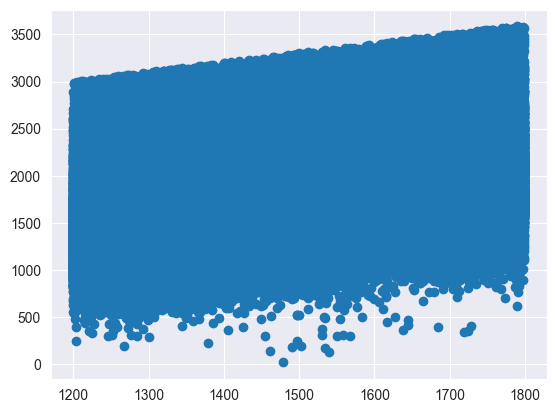

In [62]:
plt.scatter(train_eta, train_p1_geo_y)

In [63]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

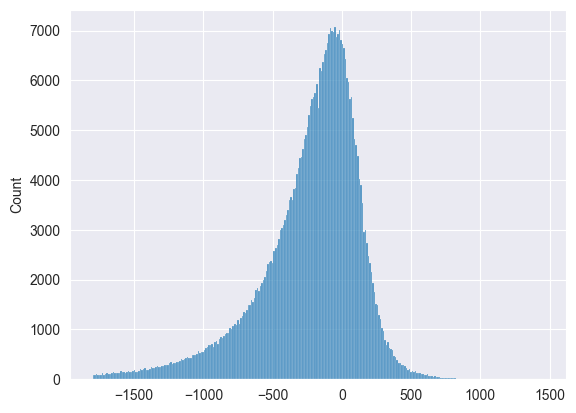

In [64]:
eta_err = train_p1_geo_x['eta'] - train_p1_geo_y
sns.histplot(eta_err)

In [65]:
print(eta_err.mean())
print(eta_err.std())
print(eta_err.kurtosis())
print(eta_err.skew())

-230.52753964955687
364.9229767864145
1.959038628268726
-1.1453677343051023


<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

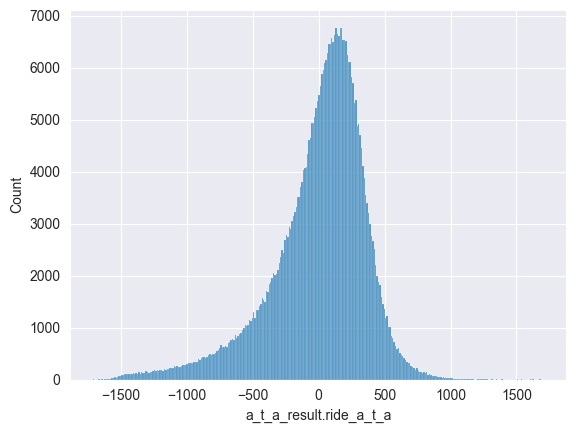

In [66]:
pred_err = train_pred_geo - train_p1_geo_y
sns.histplot(pred_err)

In [67]:
print(pred_err.mean())
print(pred_err.std())
print(pred_err.kurtosis())
print(pred_err.skew())

-7.815383634135306e-13
360.8771940150293
1.8983215137755232
-1.0628900359362234


In [154]:
reg_h3_p1 = LinearRegression().fit(train_p1_h3_x, train_p1_h3_y)

In [155]:
print(reg_h3_p1.coef_)
print(reg_h3_p1.intercept_)

[ 1.26783627e+10  1.26783627e+10  3.36497938e+11  1.26783627e+10
  1.26783627e+10  1.26783627e+10  1.26783627e+10  1.26783627e+10
 -2.61619424e+09 -2.61619425e+09 -3.26435770e+11 -2.61619425e+09
 -2.61619425e+09 -2.61619425e+09 -2.61619424e+09 -2.61619425e+09
  9.86321442e-01 -2.57691789e-02  8.68180725e+00]
-10062168381.208202


In [156]:
train_pred_h3 = reg_h3_p1.predict(train_p1_h3_x)
test_pred_h3 = reg_h3_p1.predict(test_p1_h3_x)

In [157]:
known_h3_index = np.count_nonzero(test_p1_h3_x[:, 0:17], axis=1) == 2

In [158]:
test_p1_h3_y = test_p1_h3_y[known_h3_index]
test_p1_h3_x = test_p1_h3_x[known_h3_index]
test_pred_h3 = test_pred_h3[known_h3_index]

In [45]:
d = {'eta': train_p1_geo_x['eta'], 'seldon': train_pred_geo, 'ata': train_p1_geo_y, 'eta - ata': train_p1_geo_x['eta'] - train_p1_geo_y, 'seldon - ata': train_pred_geo - train_p1_geo_y}
df = pd.DataFrame(data=d)
df[abs(df['eta - ata']) > 2200]

,eta,seldon,ata,eta - ata,seldon - ata
2976,1526,1836.110116,4156,-2630,-2319.889884
3358,1678,2006.297146,3904,-2226,-1897.702854
4773,1331,1572.528030,3843,-2512,-2270.471970
6554,1668,1976.782710,4060,-2392,-2083.217290
8386,1334,1450.304367,3802,-2468,-2351.695633
...,...,...,...,...,...
4042946,1750,2124.569817,4674,-2924,-2549.430183
4044773,1773,2162.366582,4176,-2403,-2013.633418
4049608,1626,1969.847027,4132,-2506,-2162.152973
4051682,1641,2036.224360,5930,-4289,-3893.775640


In [49]:
rides_with_id.loc[38985]

accepted_driver_id                                                          798945
created_at                                                     2022-08-02 07:30:31
passenger_id                                                              15448941
source_lat                                                                35.69907
source_lng                                                               51.396088
destination_lat                                                          35.739376
destination_lng                                                          51.147438
eta                                                                           1679
provider                                                             smapp-same-dc
ata                                                                          10758
ride_id                                                                 4714926571
city                                                                             1
driv

In [111]:
1659450530 - 1659447054.0

3476.0

In [100]:
train_p1_geo_y.loc[5]

602

In [85]:
rides_with_id.loc[1168]

accepted_driver_id                                                          272800
created_at                                                     2022-08-02 14:30:46
passenger_id                                                              23145890
source_lat                                                               35.795856
source_lng                                                               51.451664
destination_lat                                                          35.810123
destination_lng                                                          51.459946
eta                                                                            506
provider                                                             smapp-same-dc
ata                                                                           1261
ride_id                                                                 4717549146
city                                                                             1
driv

In [163]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 1700.089602299952
prediction train MAE 391.8828847826638
ETA test MAE  1694.576439790576
prediction test MAE 380.4741775617792
ETA train MSE 3238072.5486344034
prediction train MSE 341481.57597539
ETA test MSE  3154440.089528796
prediction test MSE 280567.6058180186
ETA train explained_variance_score 0.07859980641326159
prediction train explained_variance_score 0.09525520688694078
ETA test explained_variance_score  0.09515334409077303
prediction test explained_variance_score 0.10264539398016503
ETA train median_absolute_error 1522.0
prediction train median_absolute_error 320.54520771353054
ETA test median_absolute_error  1525.0
prediction test median_absolute_error 320.9049128872866
ETA train r2_score -7.579172301554692
prediction train r2_score 0.09525520688694078
ETA test r2_score  -9.091132059069732
prediction test r2_score 0.10245727246334457
ETA train MAPE 0.7916681339449584
prediction train MAPE 0.17171132174216008
ETA test MAPE  0.7898949720861153
prediction test M

In [46]:
train_p4_geo_x_normalized = (train_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
train_p4_geo_y_normalized = (train_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())
# test_p4_geo_x_normalized = (test_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
# test_p4_geo_y_normalized = (test_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

reg_p4_geo_normalized = LinearRegression().fit(train_p4_geo_x_normalized, train_p4_geo_y_normalized)
print(reg_p4_geo_normalized.coef_)
print(reg_p4_geo_normalized.intercept_)

[ 0.95267888  0.03992745  0.01639903  0.14161629  0.07104881 -0.00869313
 -0.01985985]
0.027375837176890544


In [39]:
print("ETA train MAE", mean_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAE", mean_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAE ", mean_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAE", mean_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train MSE", mean_squared_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MSE", mean_squared_error(train_p4_h3_y, train_pred_h3))

print("ETA test MSE ", mean_squared_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MSE", mean_squared_error(test_p4_h3_y, test_pred_h3))


print("ETA train explained_variance_score", explained_variance_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train explained_variance_score", explained_variance_score(train_p4_h3_y, train_pred_h3))

print("ETA test explained_variance_score ", explained_variance_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test explained_variance_score", explained_variance_score(test_p4_h3_y, test_pred_h3))


print("ETA train median_absolute_error", median_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train median_absolute_error", median_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test median_absolute_error ", median_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test median_absolute_error", median_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train r2_score", r2_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train r2_score", r2_score(train_p4_h3_y, train_pred_h3))

print("ETA test r2_score ", r2_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test r2_score", r2_score(test_p4_h3_y, test_pred_h3))


print("ETA train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAPE", mean_absolute_percentage_error(test_p4_h3_y, test_pred_h3))

ETA train MAE 558.6899742605314
prediction train MAE 468.32320172854264
ETA test MAE  609.4802658229795
prediction test MAE 532.3905549659162
ETA train MSE 724259.5492995734
prediction train MSE 474510.4137146755
ETA test MSE  1005379.4640005743
prediction test MSE 706504.3378821977
ETA train explained_variance_score 0.5486781823287357
prediction train explained_variance_score 0.5735345690702949
ETA test explained_variance_score  0.4753275329161858
prediction test explained_variance_score 0.5084530615897137
ETA train median_absolute_error 353.0
prediction train median_absolute_error 347.19482421875
ETA test median_absolute_error  352.0
prediction test median_absolute_error 366.8814697265625
ETA train r2_score 0.3490729563150865
prediction train r2_score 0.5735345690702917
ETA test r2_score  0.2984759208241079
prediction test r2_score 0.5070221515223838
ETA train MAPE 0.16697790395524195
prediction train MAPE 0.1610154609737745
ETA test MAPE  0.1730999583791752
prediction test MAPE 0.17

In [47]:
train_p4_h3_x_normalized = (train_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
train_p4_h3_y_normalized = (train_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())
# test_p4_h3_x_normalized = (test_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
# test_p4_h3_y_normalized = (test_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())

reg_p4_h3_normalized = LinearRegression().fit(train_p4_h3_x_normalized, train_p4_h3_y_normalized)
print(reg_p4_h3_normalized.coef_)
print(reg_p4_h3_normalized.intercept_)

[ 3.38839243e+11  3.38839243e+11  3.38839244e+11  3.38839243e+11
  3.38839243e+11  3.38839243e+11  3.38839243e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11  1.10072538e+00 -4.58049363e-01 -1.50679642e+02]
-17055362.3876918


In [ ]:
%set_env AWS_ACCESS_KEY_ID=SokXIEc1g9vNqCJt4CSObyk6vumoOOPQ
%set_env AWS_SECRET_ACCESS_KEY=QNyTpGhFjUTYSP9VKmfhpUizwKr0t8gk
%set_env MLFLOW_S3_ENDPOINT_URL=https://minio-clustered-smapp-storage.apps.private.teh-1.snappcloud.io

# create experiment
%set_env MLFLOW_TRACKING_URI=https://mlflow.apps.private.okd4.teh-1.snappcloud.io/
# mlflow experiments create --experiment-name elahe

# run script under experiment
%set_env MLFLOW_EXPERIMENT_NAME=elahe
# cd save/
# python test.py

In [ ]:
! echo $AWS_ACCESS_KEY_ID
! echo $AWS_SECRET_ACCESS_KEY
! echo $MLFLOW_S3_ENDPOINT_URL
! echo $MLFLOW_TRACKING_URI
! echo $MLFLOW_EXPERIMENT_NAME

In [ ]:
# with mlflow.start_run(run_name="regression") as run:
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=reg_p4,
#         artifact_path="regression",
#         registered_model_name="reg-model"
#     )

In [ ]:
# with mlflow.start_run(run_name="YOUR_RUN_NAME") as run:
#     params = {"n_estimators": 5, "random_state": 42}
#     sk_learn_rfr = RandomForestRegressor(**params)
#
#     # Log parameters and metrics using the MLflow APIs
#     mlflow.log_params(params)
#     mlflow.log_param("param_1", randint(0, 100))
#     mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})
#
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="sklearn-model",
#         registered_model_name="sk-learn-random-forest-reg-model"
#     )